# Curso de Introdução à Ciência de Dados
##### Programa de Pós-Graduação em Economia - PPGE

## Módulo 14 - Gráficos e *Storytelling*

###### Prof. Hilton Ramalho
###### Prof. Aléssio Almeida

## Objetivo
Explorar as principais funções de criação de gráficos e criação de relatórios.

## Conteúdo
1. Transformando dados em gráficos


# Principais pacotes utilizados em gráficos

*   Pandas - https://pandas.pydata.org/
*   Matplotlib - https://matplotlib.org/
*   Seaborn - https://seaborn.pydata.org/
*   Geopandas - https://geopandas.org/
*   Plotly - https://plotly.com/python/



# Carregar diretório compartilhado

In [ ]:
from google.colab import drive
drive.mount('/content/drive/', force_remount=True)

# Instalar pacotes

In [ ]:
!pip3 install geopandas mapclassify contextily plotly mpl-finance

     |████████████████████████████████| 972kB 5.7MB/s 
     |████████████████████████████████| 14.8MB 226kB/s 
     |████████████████████████████████| 6.5MB 42.1MB/s 
     |████████████████████████████████| 18.3MB 254kB/s 


# Importação de pacotes gráficos

- As abreviações mais usadas:

```
import matplotlib.pyplot as plt
import seaborn as sns
```

# Gráfico de linhas

- O gráfico de linhas é usualmente empregado quando temos séries de longa frequência, geralmente por dimensão temporal ou categorica.

**Exemplo** - Simulando uma série do pandas.

In [ ]:
# Carregar pacotes
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from numpy.random import randn

# Simular uma série aleatória indexada por datetime
ts = pd.Series(randn(1000), index=pd.date_range('1/1/2000', periods=1000))

# Tomar a soma acumulada da série aleatória
ts = ts.cumsum()

# Resultado
ts

**Gráfico de linhas** - Usando o pacote matplotlib

In [ ]:
# Importar o pacote
import matplotlib.pyplot as plt
plt.style.use('default')

# Preparação da área (tamanho da figura) e painel gráfico
plt.subplots( nrows=1, ncols=1, figsize = (8, 2))

# Plotar o gráfico para a série pandas
ts.plot()

# Finalizar exibição
plt.show()

**Gráfico de linhas** - Usando os pacotes matplotlib e seaborn

In [ ]:
# Importar
import seaborn as sns

# Preparar área/painel do gráfico
plt.subplots(figsize = (8, 2))

# Usando o método lineplot do pacote seaboarn
sns.lineplot(x=ts.index, y=ts)

# Finalizando
plt.show()

**Exemplo**:  Gráfico interativo com o pacote Plotly.

In [ ]:
import plotly.express as px

df = px.data.gapminder().query("country=='Canada'")
fig = px.line(df, x="year", y="lifeExp", title='Life expectancy in Canada')
fig.show()

## Exemplos aplicados

- Dados históricos do Índice IBOVESPA - 1994/2020

- Fonte: Yahoo Finance https://finance.yahoo.com/quote/%5EBVSP/history?period1=772934400&period2=1606694400&interval=1d&filter=history&frequency=1d&includeAdjustedClose=true

- **Importar dados**

In [ ]:
# Pacotes
import os
import pandas as pd
import numpy as np

# Mudando diretório de trabalho
os.chdir('/content/drive/Shared drives/DS-PY')

# Checar qual é o diretório de trabalho
os.getcwd()

# Ler dados históricos IBOVESPA
df = pd.read_csv('ibovespa.csv')
print(df.info())
df

- **Limpeza e transformações**

In [ ]:
# Conversão de data string para datetime
df['Date'] = pd.to_datetime(df['Date'])

# Cálculo do retorno - taxa de variação diária
df['Return'] = np.log(df['Close']/df['Close'].shift(1))

# Remoção de dados faltantes
df.dropna(inplace=True)

# Dataframe
print(df.info())
df

**Gráficos de linhas** - pacote seaborn

In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots(figsize = (8, 2))

# Alterando o tema
sns.set_theme(style='whitegrid')

# Gráfico de série do valor de fechamento
sns.lineplot(data=df, x="Date", y="Close")

# Finalizar
plt.show()


## Gráfico de linhas - customizações

**Gráficos de linhas** - Aumentando o tamanho e usando grade de linhas e colunas.

In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots(nrows=1, ncols=1, figsize = (18, 4))

# Alterando o tema
sns.set_theme(style='whitegrid')

# Gráfico de série do valor de fechamento
sns.lineplot(data=df, x="Date", y="Close")

# Finalizando
plt.show()

**Gráficos de linhas** - Alterando o estilo/tema.

In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots(figsize = (18, 4))

# Alterando o tema
sns.set_theme(style='darkgrid')

# Gráfico de série do valor de fechamento
sns.lineplot(data=df, x="Date", y="Close")
plt.show()

**Gráficos de linhas** - Alterando a escala do eixo-y e os rótulos os eixos.


In [ ]:
# Preparar tamanho e painel gráfico
fig, ax = plt.subplots(figsize = (15, 3))

# Recebemos dois objetos - Figura e Eixos do painel gráfico.
print(fig, ax)

In [ ]:

# Preparar tamanho e painel gráfico
fig, ax = plt.subplots(figsize = (15, 4))

# Alterando o tema
sns.set_theme(style='whitegrid')

# Alterar a escala do eixo-Y para log
ax.set(yscale="log")

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor de fechamento")
plt.title("Índice IBOVESPA")

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df, x="Date", y="Close")

# Finalizar
plt.show(g)

**Gráficos de linhas** - Múltiplas séries e legendas.


In [ ]:
df.info()

In [ ]:
# Agregar os dados por mês e tomar min, max de fechamento
df_mensal = df.groupby(pd.Grouper(key='Date', freq='M'))["Close"].agg(["max", "min"]).reset_index()

# Adicionar data como indexador de linhas
df_mensal.index = df_mensal.Date

# Planilha
df_mensal

In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots( nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA")

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df_mensal)

# Finalizar
plt.show(g)


**Gráficos de linhas** - Posicionamento de legendas.


In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots( nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA")

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df_mensal)

# Escolha automátca da melhor posição
plt.legend(loc='best')

# Finalizar
plt.show(g)

In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots( nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA")

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df_mensal)

# Escolha da posição
plt.legend(loc='lower right')

# Finalizar
plt.show(g)

In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots( nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA")

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df_mensal)

# Escolha da posição
plt.legend(loc='upper center')

# Finalizar
plt.show(g)

In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots(nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA")

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df_mensal)

# Escolha da posição
plt.legend(loc='lower center')

# Finalizar
plt.show(g)

**Gráficos de linhas** - Disposição horizontal/vertical de legendas.

In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots(nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA")

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df_mensal)

# Escolha da posição e disposição horizontal
plt.legend(loc='upper left', ncol = 2)

# Finalizar
plt.show(g)

In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots(nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA")

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df_mensal)

# Escolha da posição e disposição horizontal
plt.legend(["Valor máximo", "Valor Mínimo"], loc='upper left', ncol = 2)

# Finalizar
plt.show(g)

**Gráficos de linhas** - Título legendas.


In [ ]:
# Preparar tamanho e painel gráfico
plt.subplots(nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA", fontdict={'fontsize': 'x-large'})

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df_mensal)

# Escolha da posição, disposição horizontal e título
plt.legend(["Valor máximo", "Valor Mínimo"], title='Legenda', loc='upper left', ncol = 2)

# Finalizar
plt.show(g)

In [ ]:
# Preparar tamanho e painel gráfico
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize = (17, 5))

# Alterando o tema
sns.set_theme(style='white')

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA", fontdict={'fontsize': 'x-large'})

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df_mensal)

# Escolha da posição, disposição horizontal e título
plt.legend(["Valor máximo", "Valor Mínimo"], title='Legenda', loc='upper left', ncol = 2)

# Remover bordas da caixa
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Finalizar
plt.show(g)

**Gráficos de linhas** - Painel gráfico.

In [ ]:
# Preparar tamanho e painel gráfico
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize = (17, 5))

# Alterando o tema
sns.set_theme(style='whitegrid')

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA", fontdict={'fontsize': 'x-large'})

# Gráfico de série do valor de fechamento
g = sns.lineplot(data=df_mensal)

# Escolha da posição, disposição horizontal e título
plt.legend(["Valor máximo", "Valor Mínimo"], title='Legenda', loc='upper left', ncol = 2)

# Remover bordas da caixa
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Finalizar
plt.show(g)

- Data frame em formato longo.

In [ ]:
df_max = df[["Date", "Close"]].groupby(pd.Grouper(key="Date", freq="M")).max().reset_index()
df_max["Category"] = "Máximo"
df_max

In [ ]:
df_min = df[["Date", "Close"]].groupby(pd.Grouper(key="Date", freq="M")).min().reset_index()
df_min["Category"] = "Mínimo"
df_min

In [ ]:
df_mensal = df_min.append(df_max)
df_mensal

In [ ]:
# Preparar tamanho e painel gráfico
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize = (15, 4))

# Alterando o tema
sns.set_theme(style='whitegrid')

# Rotular 
plt.xlabel("Ano/mês")
plt.ylabel("Valor máximo/mínimo de fechamento")
plt.title("Índice IBOVESPA", fontdict={'fontsize': 'x-large'})

sns.lineplot(data=df_mensal, x="Date", y="Close", hue="Category", alpha=.7)

In [ ]:

g = sns.FacetGrid(df_mensal, col="Category", height=5)
g.map(sns.lineplot, "Date", "Close", alpha=.7)
g.set_xlabels(label="Ano/mês")
g.set_ylabels(label="Valor de fechamento")

axes = g.axes.flatten()
axes[0].set_title("Índice IBOVESPA - Mínimo")
axes[1].set_title("Índice IBOVESPA - Máximo")

In [ ]:
g = sns.FacetGrid(df_mensal, row="Category", aspect=4)
g.map(sns.lineplot, "Date", "Close", alpha=.7)
g.set_xlabels(label="Ano/mês")
g.set_ylabels(label="Valor de fechamento")

axes = g.axes.flatten()
axes[0].set_title("Índice IBOVESPA - Mínimo")
axes[1].set_title("Índice IBOVESPA - Máximo")

**Gráficos de linhas** - Paleta de cores.


https://seaborn.pydata.org/tutorial/color_palettes.html#palette-tutorial

In [ ]:
sns.color_palette()

In [ ]:
sns.color_palette("Set2")

In [ ]:

g = sns.FacetGrid(df_mensal, col="Category", height=5)
g.map(sns.lineplot, "Date", "Close", alpha=.7, color='green')
g.set_xlabels(label="Ano/mês")
g.set_ylabels(label="Valor de fechamento")

axes = g.axes.flatten()
axes[0].set_title("Índice IBOVESPA - Mínimo")
axes[1].set_title("Índice IBOVESPA - Máximo")


**Gráficos de linhas** - Linhas com marcadores.

In [ ]:
sns.set_palette("Purples_r")
g = sns.FacetGrid(df_mensal, col="Category", height=5)
g.map(sns.lineplot, "Date", "Close", marker="o")
g.set_xlabels(label="Ano/mês")
g.set_ylabels(label="Valor de fechamento")

axes = g.axes.flatten()
axes[0].set_title("Índice IBOVESPA - Mínimo")
axes[1].set_title("Índice IBOVESPA - Máximo")

**Gráficos de linhas** - Linhas intervalos.

In [ ]:
# Agregar os dados por mês e tomar min, max de fechamento
df_mensal = df[["Date", "Close"]].groupby(pd.Grouper(key='Date', freq='M')).agg(["max", "min"]).reset_index()
df_mensal.index = df_mensal.Date
df_mensal

In [ ]:
# Gráfico de série do valor de fechamento
g = sns.FacetGrid(df_mensal, height=3, aspect=6)
g.map(sns.lineplot, data=df_mensal)
g.set_xlabels(label="Ano/mês")
g.set_ylabels(label="Valor de fechamento")
g.set_titles(template="Índice IBOVESPA")

## Análise Técnica de Ações - Gráfico de Linhas com velas - CandleStick

[Sobre o CandleStick](https://blog.rico.com.vc/analise-tecnica-o-que-e?campaignid=316171546&adgroupid=55392294370&feeditemid=&targetid=dsa-19959388920&loc_interest_ms=&loc_physical_ms=1001622&matchtype=b&network=g&device=c&devicemodel=&ifmobile=&ifmobile=0&ifsearch=1&ifsearch=&ifcontent=0&ifcontent=&creative=298673772136&keyword=&placement=&target=&utm_source=google&utm_medium=cpc&utm_term=&utm_campaign=GGLE_PESQ_DSA&hsa_tgt=dsa-19959388920&hsa_net=adwords&hsa_kw=&hsa_grp=55392294370&hsa_acc=7134496929&hsa_ver=3&hsa_ad=298673772136&hsa_cam=316171546&hsa_mt=b&hsa_src=g&gclid=Cj0KCQiAtqL-BRC0ARIsAF4K3WEcEvpLJN0sSq6C30BaZHJQg-Ui5HJ6A9KIorFeCZ4wWLZw0VolyjYaAnSfEALw_wcB)

[Resumo](https://pt.wikipedia.org/wiki/Candlestick)

- O candlestick representa graficamente a variação de preços de um determinado ativo em uma unidade de tempo, nele estão representados:

* Preço de abertura - é o preço pelo qual foi fechado o primeiro negócio do 
intervalo.
* Preço de fechamento - é o preço pelo qual foi fechado o último negócio do intervalo.
* Preço máximo - é o maior preço negociado no intervalo.
* Preço mínimo - é o menor preço negociado no intervalo.



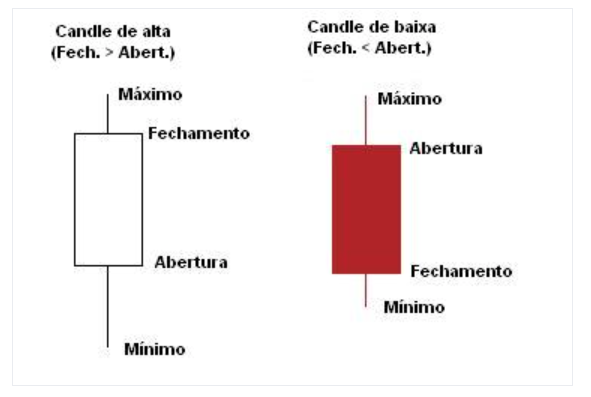


In [ ]:
# Instalar pacote mpl-finance
!pip3 install mpl-finance

In [ ]:
df_cs = df.copy()
df_cs

In [ ]:
tmp_open = df_cs[['Date', 'Adj Close']].groupby(pd.Grouper(key='Date', freq='Y')).nth([0]).rename(columns={'Adj Close': 'Open'}).drop(columns="Date")
tmp_open

In [ ]:
tmp_close = df_cs[['Adj Close', 'Date']].groupby(pd.Grouper(key='Date', freq='Y')).nth([-1]).rename(columns={'Adj Close': 'Close'}).drop(columns="Date")
tmp_close

In [ ]:
df_cs = df_cs[['Date','Low', 'High', 'Volume']].groupby(pd.Grouper(key='Date', freq='Y')).agg({'Low': 'min', 'High': 'max', 'Volume': 'mean'})
df_cs

In [ ]:
import matplotlib.dates as mdates
df_cs = pd.concat([df_cs, tmp_open,tmp_close],axis=1).reset_index()
df_cs["Date"] = mdates.date2num(df_cs["Date"].values)
df_cs = df_cs[["Date", "Open", "High", "Low", "Close", "Volume"]]
df_cs

In [ ]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

# Preparar tamanho e painel gráfico
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano")
plt.ylabel("Valor de fechamento")
plt.title("Índice IBOVESPA")
ax.xaxis_date()
# Gráfico de série do valor de fechamento
candlestick_ohlc(ax, df_cs.values, width=200, colorup='g', colordown='r', alpha=0.8)

# Finalizar
plt.show()


Exemplo - Análise por **trimestre**

In [ ]:
df_cs = df.copy()
tmp_open = df_cs[['Date', 'Adj Close']].groupby(pd.Grouper(key='Date', freq='Q')).nth([0]).rename(columns={'Adj Close': 'Open'}).drop(columns="Date")
tmp_close = df_cs[['Adj Close', 'Date']].groupby(pd.Grouper(key='Date', freq='Q')).nth([-1]).rename(columns={'Adj Close': 'Close'}).drop(columns="Date")
df_cs = df[['Date','Low', 'High', 'Volume']].groupby(pd.Grouper(key='Date', freq='Q')).agg({'Low': 'min', 'High': 'max', 'Volume': 'mean'})
import matplotlib.dates as mdates
df_cs = pd.concat([df_cs, tmp_open,tmp_close],axis=1).reset_index()
df_cs["Date"] = mdates.date2num(df_cs["Date"].values)
df_cs = df_cs[["Date", "Open", "High", "Low", "Close", "Volume"]]
df_cs

In [ ]:
from mpl_finance import candlestick_ohlc

# Preparar tamanho e painel gráfico
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano")
plt.ylabel("Valor de fechamento")
plt.title("Índice IBOVESPA")
ax.xaxis_date()
# Gráfico de série do valor de fechamento
candlestick_ohlc(ax, df_cs.values, width=200, colorup='g', colordown='r', alpha=0.8)

# Finalizar
plt.show()

# Gráfico de Área

**Exemplos** - Casos simples com dados simulados

In [ ]:
df = pd.DataFrame({
    'sales': [3, 2, 3, 9, 10, 6],
    'signups': [5, 5, 6, 12, 14, 13],
    'visits': [20, 42, 28, 62, 81, 50],
}, index=pd.date_range(start='2018/01/01', end='2018/07/01',
                       freq='M'))
ax = df.plot.area()

In [ ]:
ax = df.plot.area(stacked=False)

In [ ]:
ax = df.plot.area(y='sales')

**Exemplos** - Áreas empilhadas

In [ ]:
# Pacotes
import os
import pandas as pd
import numpy as np

# Mudando diretório de trabalho
os.chdir('/content/drive/Shared drives/DS-PY')

# Checar qual é o diretório de trabalho
os.getcwd()

# Ler dados históricos IBOVESPA
df = pd.read_csv('ibovespa.csv')

# Conversão de data string para datetime
df['Date'] = pd.to_datetime(df['Date'])

# Cálculo do retorno - taxa de variação diária
df['Return'] = np.log(df['Close']/df['Close'].shift(1))

# Remoção de dados faltantes
df.dropna(inplace=True)
df

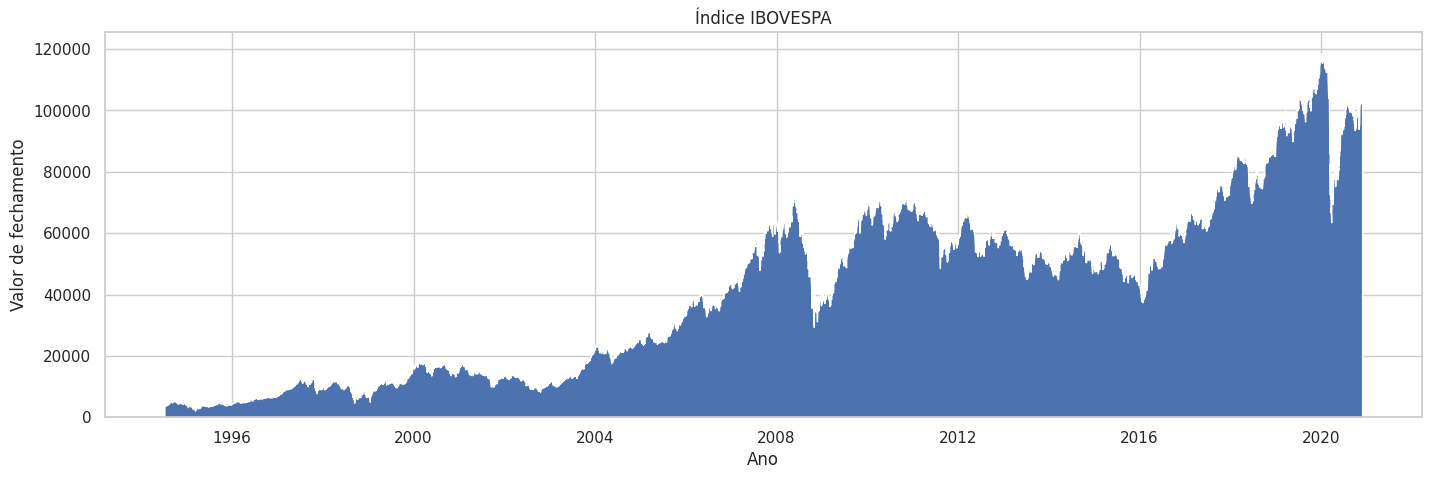

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar tamanho e painel gráfico
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano")
plt.ylabel("Valor de fechamento")
plt.title("Índice IBOVESPA")

plt.stackplot(df["Date"].values, df["Close"].values)

# Finalizar
plt.show()

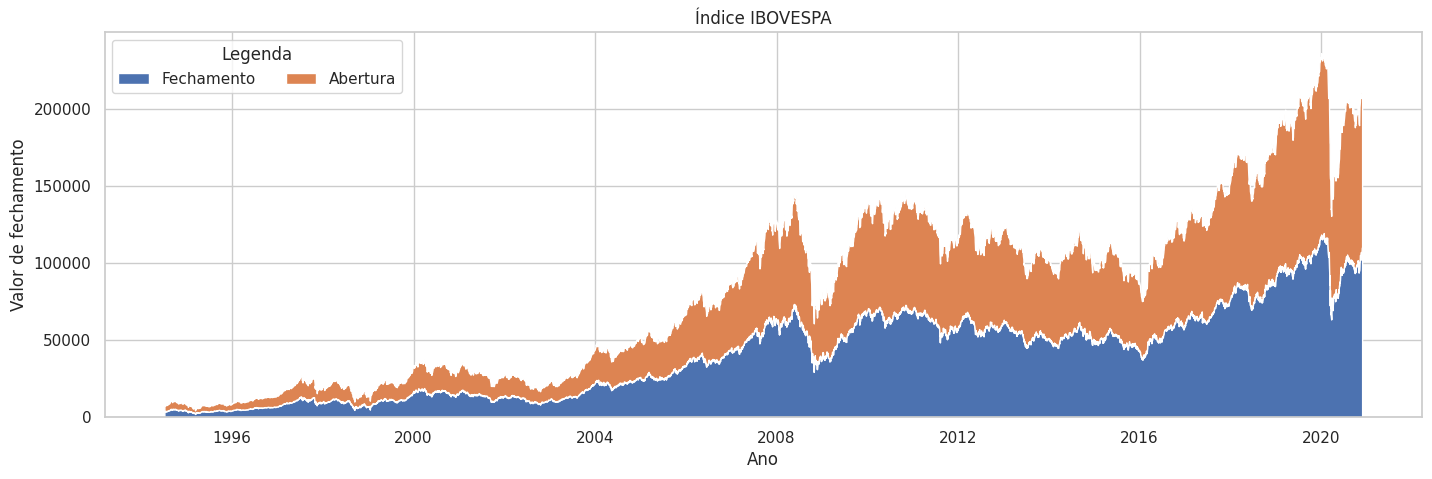

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Preparar tamanho e painel gráfico
fig, ax = plt.subplots(nrows=1, ncols=1,  figsize = (17, 5))

# Rotular 
plt.xlabel("Ano")
plt.ylabel("Valor de fechamento")
plt.title("Índice IBOVESPA")

plt.stackplot(df["Date"].values, df[["Close","Open"]].values.T, labels=("Fechamento", "Abertura"))

# Escolha da posição, disposição horizontal e título
plt.legend(["Fechamento", "Abertura"], title='Legenda', loc='upper left', ncol = 2)


# Finalizar
plt.show()

# Gráficos de barras

<Figure size 640x480 with 0 Axes>

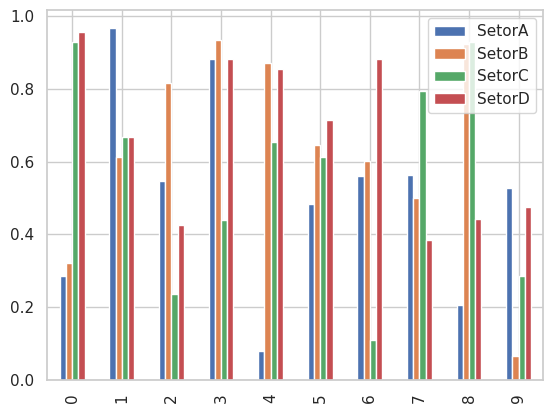

In [ ]:
import pandas as pd 
from numpy.random import rand

df = pd.DataFrame(rand(10, 4), columns=['SetorA', 'SetorB', 'SetorC', 'SetorD'])

plt.figure()
df.plot(kind='bar')


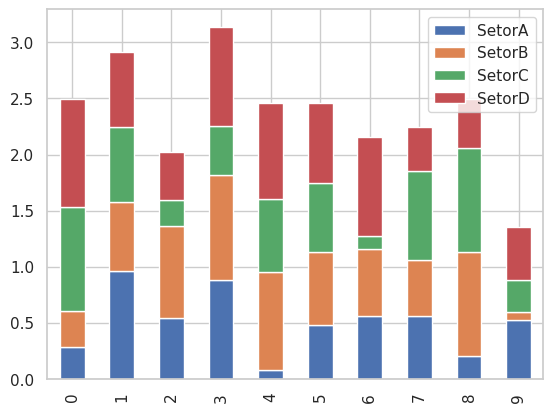

In [ ]:
df.plot(kind='bar', stacked=True);

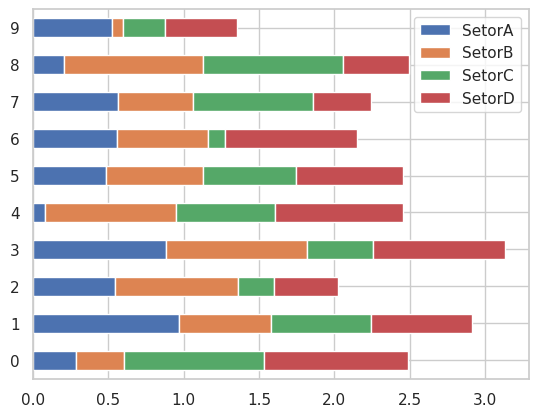

In [ ]:
df.plot(kind='barh', stacked=True)

**Exemplos** - Aplicação com dados do Censo Demográfico

- Importar arquivo de **micro dados do Censo Demográfico de 2010** - IBGE usando informações sobre a posição incial de 
cada coluna e a posição final.

- https://www.ibge.gov.br/estatisticas/sociais/populacao/25089-censo-1991-6.html?=&t=o-que-e

- Dicionário de dados: https://docs.google.com/spreadsheets/d/1AMDHmgoVRZqpB6rGvL04MQtUUwCA-PIL

- Observe que no arquivo de dicionário  são informados os campos de posição inicial, posição final, digitos inteiros e dígitos decimais de cada coluna. 
- Para facilitar, criaremos uma função auxiliar que converterá as informações de posição inicial e tamanho para posição incial e posição final na forma do pandas.


In [ ]:
import os
import pandas as pd

# Mudando diretório de trabalho
os.chdir('/content/drive/Shared drives/DS-PY')

# Checar qual é o diretório de trabalho
os.getcwd()

# Lista de nomes
nomes = ['uf', 'peso_amostral', 'sexo', 'cor', 'idade', 'instrucao', 'renda_dom']

# Criamos uma lista de tuplas com (inicio, final) comforme 
# o arquivo do IBGE e as colunas que desejamos importar
inicio_final = [(1,2), (29,44), (58,58), (68,68), (62,64), (158, 158), (279, 285)]

# Criamos uma função anônima para converter nossa lista
# para (inicio, final) conforme indexação do python (begin = inicio-1, end=final)
conv_posicao = lambda lista: [ (s[0]-1,s[1]) for s in lista ]

# Vamos converter a coluna peso amostral para float
# e dividir por 10^13, onde 13 é total de dígitos decimais
# informados no dicionário de dados
conv_nomes = {
    'peso_amostral': lambda x: float(x)/10**13
    }

# Aplicamos a conversão de parâmetros para leitura do pandas
posicao = conv_posicao(inicio_final)

# Leitura do arquivo de dados passando as posições e nomes
df = pd.read_fwf('censo_demografico_2010/Amostra_Pessoas_25.txt',
                 colspecs = posicao,
                 names = nomes, 
                 converters=conv_nomes
                 )

df.replace( {'sexo': {1: 'Masculino', 2: 'Feminino'}, 
            'cor': {1: 'Branca', 2: 'Preta', 3: 'Amarela', 4: 'Parda', 5: 'Indígena', 9: 'Não declarou' },
            'instrucao': {1: 'Sem instrução e fundamental incompleto',
                          2: 'Fundamental completo e médio incompleto',
                          3: 'Médio completo e superior incompleto',
                          4: 'Superior completo',
                          5: 'Não informada'}
            }, inplace=True)

# Resultado
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571631 entries, 0 to 571630
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   uf             571631 non-null  int64  
 1   peso_amostral  571631 non-null  float64
 2   sexo           571631 non-null  object 
 3   cor            571631 non-null  object 
 4   idade          571631 non-null  int64  
 5   instrucao      571631 non-null  object 
 6   renda_dom      570911 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 30.5+ MB
None


,uf,peso_amostral,sexo,cor,idade,instrucao,renda_dom
0,25,4.960883,Masculino,Branca,34,Sem instrução e fundamental incompleto,612.0
1,25,4.960883,Feminino,Branca,1,Sem instrução e fundamental incompleto,612.0
2,25,4.960883,Feminino,Branca,5,Sem instrução e fundamental incompleto,612.0
3,25,4.960883,Feminino,Parda,28,Fundamental completo e médio incompleto,612.0
4,25,4.945709,Masculino,Parda,13,Sem instrução e fundamental incompleto,2000.0
...,...,...,...,...,...,...,...
571626,25,2.520554,Feminino,Branca,29,Sem instrução e fundamental incompleto,250.0
571627,25,2.520554,Masculino,Branca,9,Sem instrução e fundamental incompleto,250.0
571628,25,2.520554,Feminino,Branca,7,Sem instrução e fundamental incompleto,250.0
571629,25,1.889369,Masculino,Parda,64,Sem instrução e fundamental incompleto,910.0


In [ ]:
df_cor = df[["cor", "peso_amostral"]].groupby("cor").sum().rename(columns={"peso_amostral": "populacao"}).reset_index()
df_cor

,cor,populacao
0,Amarela,4.663070e+04
1,Branca,1.494248e+06
2,Indígena,1.948982e+04
3,Não declarou,4.821924e+02
4,Parda,1.994319e+06
5,Preta,2.113585e+05


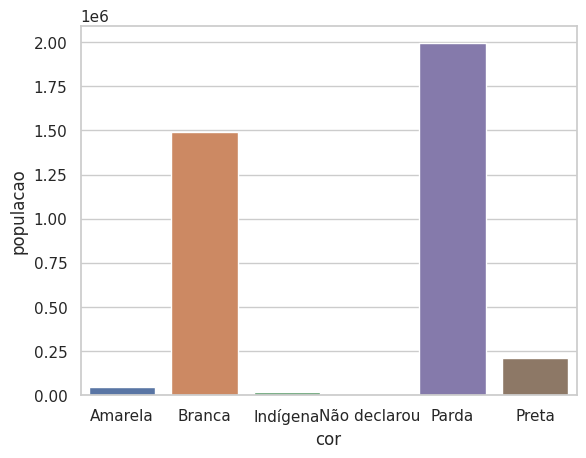

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(x="cor", y="populacao", data=df_cor)

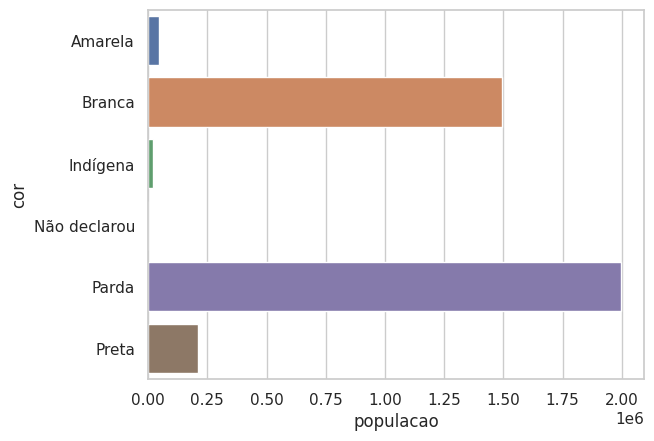

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(y="cor", x="populacao", data=df_cor)

In [ ]:
df_sexo = df[["sexo", "peso_amostral"]].groupby("sexo").sum().rename(columns={"peso_amostral": "populacao"}).reset_index()
df_sexo

,sexo,populacao
0,Feminino,1942149.0
1,Masculino,1824379.0


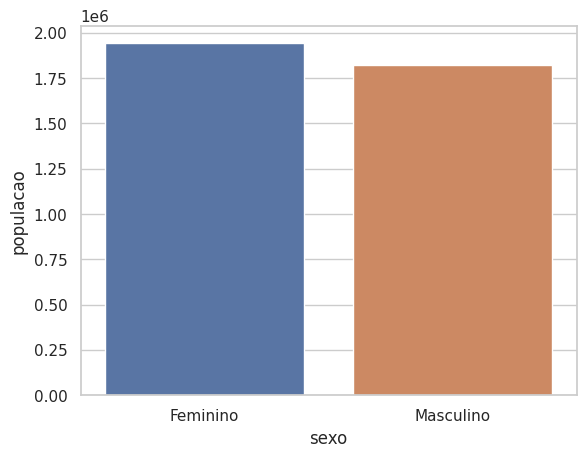

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")
sns.barplot(x="sexo", y="populacao", data=df_sexo)

In [ ]:
df_m = df[["cor", "sexo", "peso_amostral"]].groupby(["sexo","cor"]).sum().rename(columns={"peso_amostral": "populacao"}).reset_index()
df_m

,sexo,cor,populacao
0,Feminino,Amarela,2.683271e+04
1,Feminino,Branca,7.894940e+05
2,Feminino,Indígena,9.563054e+03
3,Feminino,Não declarou,2.609023e+02
4,Feminino,Parda,1.015564e+06
5,Feminino,Preta,1.004339e+05
6,Masculino,Amarela,1.979800e+04
7,Masculino,Branca,7.047540e+05
8,Masculino,Indígena,9.926766e+03
9,Masculino,Não declarou,2.212900e+02


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


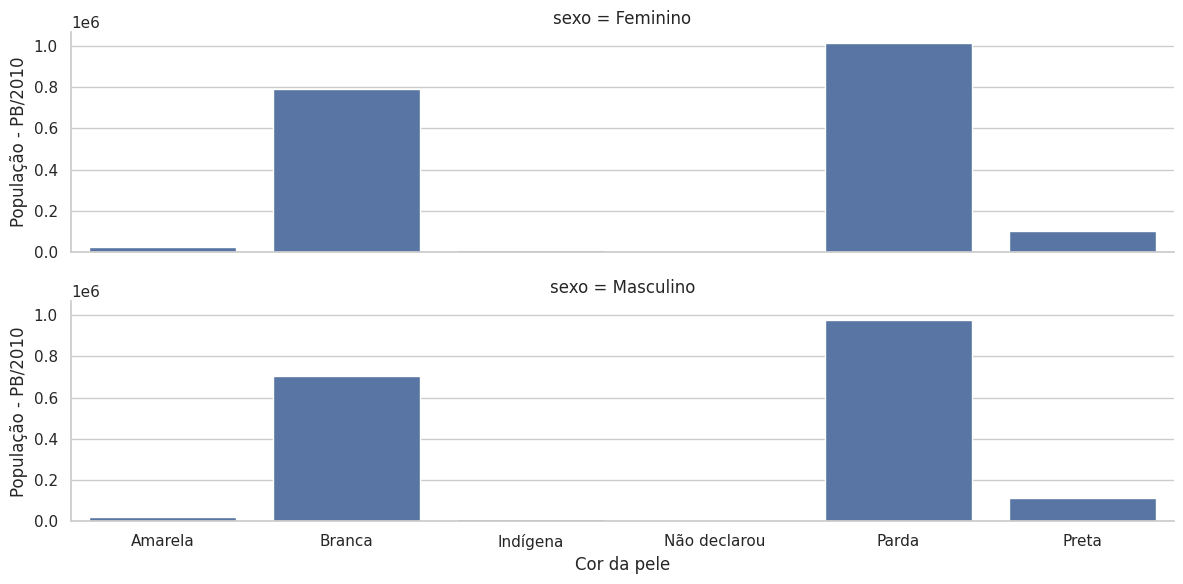

In [ ]:
g = sns.FacetGrid(df_m, row="sexo", aspect=4)
g.map(sns.barplot, "cor", "populacao")
g.set_xlabels(label="Cor da pele")
g.set_ylabels(label="População - PB/2010")

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:645: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


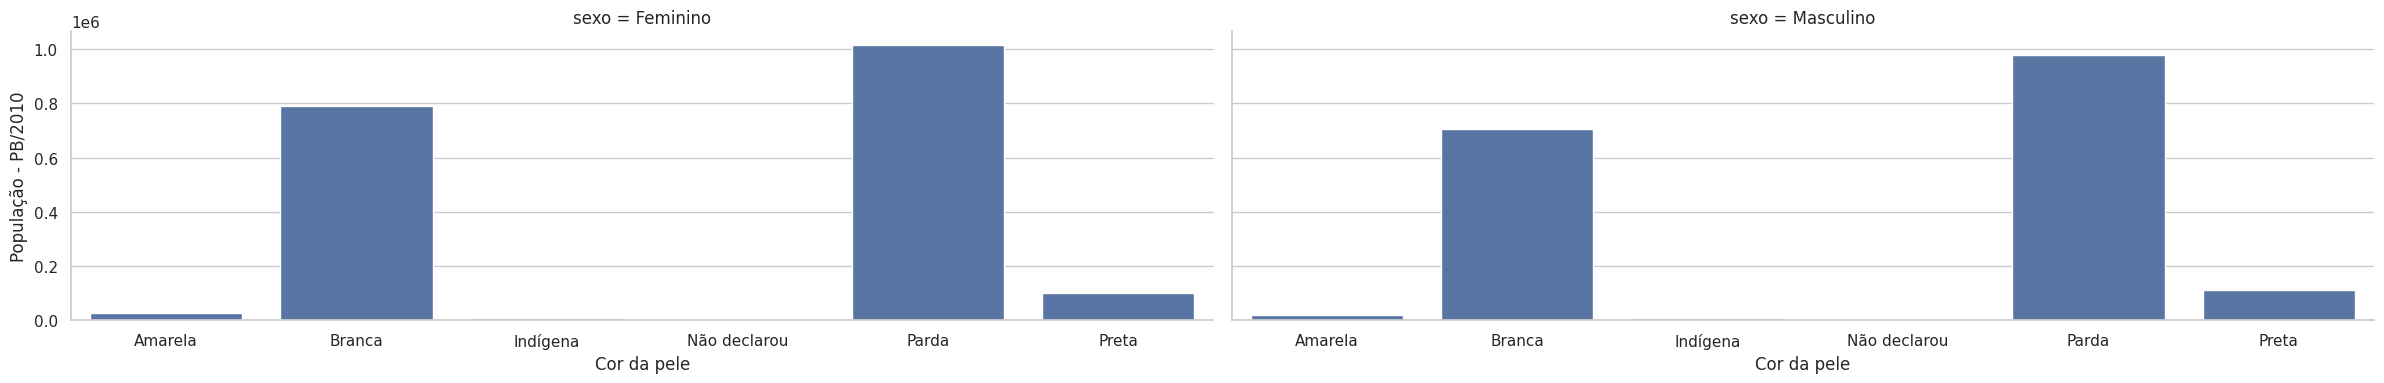

In [ ]:
g = sns.FacetGrid(df_m, col="sexo", aspect=3, height=4)
g.map(sns.barplot, "cor", "populacao")
g.set_xlabels(label="Cor da pele")
g.set_ylabels(label="População - PB/2010")


## Histogramas

In [ ]:
df = pd.DataFrame(randn(1000, 4), index=ts.index, columns=list('ABCD'))
df = df.cumsum()
 
plt.figure()
df['A'].diff().hist()

In [ ]:
plt.figure()
df.diff().hist(color='k', alpha=0.5, bins=50)

In [ ]:
from numpy.random import randint
data = pd.Series(randn(1000))
data.hist(by=randint(0, 4, 1000), figsize=(6, 4))


# Gráfico de Torta (Pizza)

In [ ]:
df = pd.DataFrame({'mass': [0.330, 4.87 , 5.97],
                   'radius': [2439.7, 6051.8, 6378.1]},
                  index=['Mercury', 'Venus', 'Earth'])
plot = df.plot.pie(y='mass', figsize=(5, 5))


In [ ]:
plot = df.plot.pie(subplots=True, figsize=(11, 6))

In [ ]:
# library
import matplotlib.pyplot as plt

# create data
size_of_groups=[12,11,3,30]

# Create a pieplot
plt.pie(size_of_groups)


# add a circle at the center
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.show()


# Box-Plot

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from numpy.random import rand

df = pd.DataFrame(rand(10,5))

plt.figure()

bp = df.boxplot()

In [ ]:
df = pd.DataFrame(rand(10,2), columns=['Col1', 'Col2'] )

df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

plt.figure()

bp = df.boxplot(by='X')

In [ ]:
df = pd.DataFrame(rand(10,3), columns=['Col1', 'Col2', 'Col3'])

df['X'] = pd.Series(['A','A','A','A','A','B','B','B','B','B'])

df['Y'] = pd.Series(['A','B','A','B','A','B','A','B','A','B'])

plt.figure()

bp = df.boxplot(column=['Col1','Col2'], by=['X','Y'])

# Densidades

In [ ]:
ser = pd.Series(randn(1000))
ser.plot(kind='kde')

# Gráfico de Dispersão

In [ ]:
df = pd.DataFrame([[5.1, 3.5, 0], [4.9, 3.0, 0], [7.0, 3.2, 1],
                   [6.4, 3.2, 1], [5.9, 3.0, 2]],
                  columns=['length', 'width', 'species'])
ax1 = df.plot.scatter(x='length',
                      y='width',
                      c='DarkBlue')

In [ ]:
ax2 = df.plot.scatter(x='length',
                      y='width',
                      c='species',
                      colormap='viridis')

In [ ]:
from pandas.plotting import radviz
from pandas import read_csv

data = read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv')

plt.figure()
radviz(data, 'Iris-setosa')

# Gráfico de Matriz: Dispersão e Densidade

In [ ]:
from pandas.plotting import scatter_matrix

df = pd.DataFrame(randn(1000, 4), columns=['a', 'b', 'c', 'd'])
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

# Gráfico de Coordenadas Paralelas


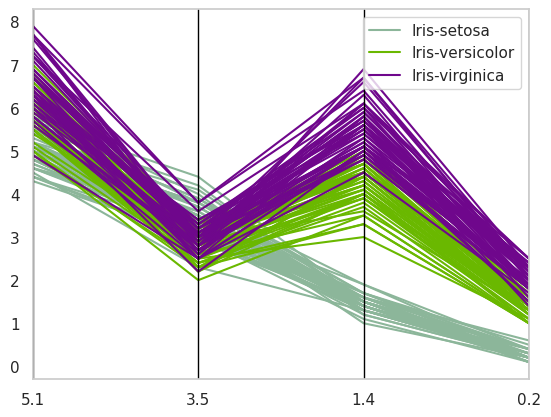

In [ ]:
import pandas as pd
from pandas.plotting import parallel_coordinates
data = pd.read_csv('https://raw.githubusercontent.com/jbrownlee/Datasets/master/iris.csv')

data
plt.figure()
parallel_coordinates(data, 'Iris-setosa')

# Gráfico de autocorrelação serial

- Autocorrelation plots are often used for checking randomness in time series. This is done by computing autocorrelations for data values at varying time lags. If time series is random, such autocorrelations should be near zero for any and all time-lag separations. If time series is non-random then one or more of the autocorrelations will be significantly non-zero. The horizontal lines displayed in the plot correspond to 95% and 99% confidence bands. The dashed line is 99% confidence band

In [ ]:
from pandas.plotting import autocorrelation_plot
import numpy as np
plt.figure()
data = pd.Series(0.7 * rand(1000) + 0.3 * np.sin(np.linspace(-9 * np.pi, 9 * np.pi, num=1000)))
autocorrelation_plot(data)

# Gráficos de Mapas

## Instruções

- Baixar arquivos shape file no site do IBGE -  https://www.ibge.gov.br/geociencias/downloads-geociencias.html
- Pasta: organizacao_do_territorio/malhas_territoriais/malhas_municipais/municipio_2019/UFs/PB/PB.zip
- O arquivo foi descompactado e colocado na pasta `pb_municipios` do GDrive.
- O contéudo inclui vários arquivos de polígonos geográficos (.dbf, .prj, .shp, .shx, .cpg). 
- Como veremos a seguir, importaremos o arquivo Shape File .shp que está integrado aos demais arquivos.

In [ ]:
import os
import pandas as pd

# Mudando diretório de trabalho
os.chdir('/content/drive/Shared drives/DS-PY')

# Checar qual é o diretório de trabalho
os.getcwd()

In [ ]:
!pip3 install geopandas mapclassify contextily

# Importar dados de shapefile

In [ ]:
import geopandas

# Importar dados e converter para geo dataframe
df_geo = geopandas.read_file('pb_municipios/PB_Municipios_2019.shp')
print(type(df))
print(df.info())
df_geo

In [ ]:
df_geo.plot()

Exemplo - Importar arquivo de micro dados do Censo Demográfico de 2010 - IBGE usando informações sobre a posição incial de cada coluna e a posição final.

https://www.ibge.gov.br/estatisticas/sociais/populacao/25089-censo-1991-6.html?=&t=o-que-e

Dicionário de dados: https://docs.google.com/spreadsheets/d/1AMDHmgoVRZqpB6rGvL04MQtUUwCA-PIL

Observe que no arquivo de dicionário são informados os campos de posição inicial, posição final, digitos inteiros e dígitos decimais de cada coluna.

Para facilitar, criaremos uma função auxiliar que converterá as informações de posição inicial e tamanho para posição incial e posição final na forma do pandas.

In [ ]:
import pandas as pd
import numpy as np

# Lista de nomes
nomes = ['cod_uf', 'cod_mun', 'peso_amostral', 'renda_dom']

# Criamos uma lista de tuplas com (inicio, final) comforme 
# o arquivo do IBGE e as colunas que desejamos importar
inicio_final = [(1,2), (3,7), (29,44), (279, 285)]

# Criamos uma função anônima para converter nossa lista
# para (inicio, final) conforme indexação do python (begin = inicio-1, end=final)
conv_posicao = lambda lista: [ (s[0]-1,s[1]) for s in lista ]

# Vamos converter a coluna peso amostral para float
# e dividir por 10^13, onde 13 é total de dígitos decimais
# informados no dicionário de dados
conv_nomes = {
    'peso_amostral': lambda x: float(x)/10**13
    }

# Aplicamos a conversão de parâmetros para leitura do pandas
posicao = conv_posicao(inicio_final)

# Leitura do arquivo de dados passando as posições e nomes
df = pd.read_fwf('censo_demografico_2010/Amostra_Pessoas_25.txt',
                 colspecs = posicao,
                 names = nomes, 
                 converters=conv_nomes
                 )

# Resultado
print(df.info())
df

In [ ]:
df.cod_mun = df.cod_uf*100000 + df.cod_mun
df.dropna(inplace=True)
df = df.astype({'cod_mun': 'str'})
print(df.info())
df

 - Calcular a média ponderada da renda domiciliar por município

In [ ]:
df = df.groupby('cod_mun').apply(lambda data: pd.Series({'renda': np.average(data['renda_dom'], weights=data['peso_amostral'])})).reset_index()
df

- Dados espaciais - herdar dados de renda média

In [ ]:
df_geo = pd.merge(left=df_geo, right=df,  how='left', left_on='CD_MUN', right_on='cod_mun' )
df_geo

## Classificação contínua

In [ ]:

plot = df_geo.plot(column='renda', figsize=(14,5),legend=True)
plot.axis('off')

In [ ]:
import matplotlib.pyplot as plt

plot = df_geo.plot(column='renda',
          cmap=plt.cm.Oranges,
          edgecolor='black',
         figsize=(10,8),
        legend=True,
       legend_kwds={'label': "Média de renda domiciliar",
                    'orientation': "horizontal"})
plot.axis('off')


In [ ]:
df_geo.plot(column='renda', cmap='OrRd', figsize=(10,8))

- Esquemas para intervalos de cores

In [ ]:
import mapclassify
help(mapclassify)

In [ ]:

df_geo.plot(column='renda',
        cmap='OrRd', 
        scheme='quantiles',
        figsize=(10,10),
        legend=True)


In [ ]:
df_geo.plot(column='renda',
        cmap='OrRd', 
        scheme='naturalbreaks',
        figsize=(10,10),
        legend=True)

In [ ]:

plot = df_geo.plot(
    column='renda',
        cmap=plt.cm.RdYlGn_r, 
        edgecolor='grey',
        scheme='naturalbreaks',
        ax=None,
        legend=True,
        figsize=(10,10),
        legend_kwds={'loc': 'lower right', 'fontsize': 10}
        )

plot.axis('off')


plot.get_figure().savefig('teste1.pdf')

## Intervalos iguais

In [ ]:
intvls = mapclassify.EqualInterval(df_geo['renda'], k=5)
intvls 

In [ ]:
intvls.bins

In [ ]:
#
f, ax = plt.subplots(1)
sns.kdeplot(df_geo.renda, shade=True)
sns.rugplot(df_geo.renda, alpha=0.5)
for cut in intvls.bins:
  plt.axvline(cut, color='red', linewidth=0.75)
plt.show()

In [ ]:
df_geo.plot(column='renda', 
            scheme='equal_interval', k=5, 
            cmap=plt.cm.Blues_r, 
            alpha=0.8, 
            legend=True,
            legend_kwds={'loc': 'lower right', 'fontsize': 10},
            edgecolor='black', 
            figsize=(10,10),
            linewidth=0.4).axis('off')


## Quantis

In [ ]:
intvls = mapclassify.Quantiles(df_geo['renda'], k=5)
intvls 

In [ ]:
f, ax = plt.subplots(1)
sns.kdeplot(df_geo.renda, shade=True)
sns.rugplot(df_geo.renda, alpha=0.5)
for cut in intvls.bins:
  plt.axvline(cut, color='red', linewidth=0.75)
plt.show()

In [ ]:
df_geo.plot(column='renda', 
            scheme='quantiles', k=5, 
            cmap=plt.cm.Reds_r, 
            alpha=0.8, 
            legend=True,
            legend_kwds={'loc': 'lower right', 'fontsize': 10},
            edgecolor='black', 
            figsize=(10,10),
            linewidth=0.4).axis('off')

## Algoritmo Fisher-Jenks

In [ ]:
intvls = mapclassify.FisherJenks(df_geo['renda'], k=5)
intvls 

In [ ]:
f, ax = plt.subplots(1)
sns.kdeplot(df_geo.renda, shade=True)
sns.rugplot(df_geo.renda, alpha=0.5)
for cut in intvls.bins:
  plt.axvline(cut, color='red', linewidth=0.75)
plt.show()

In [ ]:
df_geo.plot(column='renda', 
            scheme='fisher_jenks', k=5, 
            cmap=plt.cm.Greys, 
            alpha=0.8, 
            legend=True,
            legend_kwds={'loc': 'lower right', 'fontsize': 10},
            edgecolor='black', 
            figsize=(10,10),
            linewidth=0.4).axis('off')

## Algoritmo Box-Plot

In [ ]:
intvls = mapclassify.BoxPlot(df_geo['renda'])
intvls 

In [ ]:
f, ax = plt.subplots(1)
sns.kdeplot(df_geo.renda, shade=True)
sns.rugplot(df_geo.renda, alpha=0.5)
for cut in intvls.bins:
  plt.axvline(cut, color='red', linewidth=0.75)
plt.show()

In [ ]:
plot = df_geo.plot(
    column='renda',
        cmap=plt.cm.RdYlBu_r, 
        edgecolor='black',
        scheme='boxplot',
        legend=True,
        figsize=(12,12),
        legend_kwds={'loc': 'lower right', 'fontsize': 10}
        )

plot.axis('off')

## Zoom e recorte de mapa

In [ ]:
# Setup the figure
f, ax = plt.subplots(1)
# Set background color of the axis
ax.set_facecolor('#F0F0F0')
# Draw the choropleth
df_geo.plot(column='renda', scheme='QUANTILES', k=7, \
         cmap=plt.cm.Purples_r, ax=ax)
# [Optional] Keep axes proportionate
plt.axis('equal')
# Redimensionate X and Y axes to desired bounds
ax.set_xlim(-35.8, -34.6)
ax.set_ylim(-6.3,-7)
# Show image
plt.show()

## Adicionando camada de base

In [ ]:
import contextily as cx

ax = df_geo.to_crs(epsg=3857).plot(alpha=0.5, figsize=(10,10))
cx.add_basemap(ax);

- Provedores de camadas - https://wiki.openstreetmap.org/wiki/Tile_servers

In [ ]:
plot = df_geo.to_crs(epsg=3857).plot(
    column='renda',
        cmap=plt.cm.RdYlBu_r, 
        edgecolor='grey',
        scheme='naturalbreaks',
        legend=True,
        figsize=(12,12),
        legend_kwds={'loc': 'lower right', 'fontsize': 12}
        )

plot.axis('off')
cx.add_basemap(plot, source=cx.providers.CartoDB.Positron)

